#Import Our Libraries

In [1]:
import pandas as pd
import numpy as np

# Importing the data & Gaining Insights

In [2]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")

In [3]:
df2 = pd.read_csv("customer_churn_dataset-testing-master.csv")

In [4]:
df = pd.concat([df, df2], ignore_index = True)

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


In [7]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,200779.451782,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,137241.343095,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,63827.250000,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,193039.500000,40.000000,32.000000,16.000000,3.000000,13.000000,648.900000,14.000000,1.000000
75%,321645.750000,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [8]:
df.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [9]:
df.dropna(inplace = True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#Distribution of Age

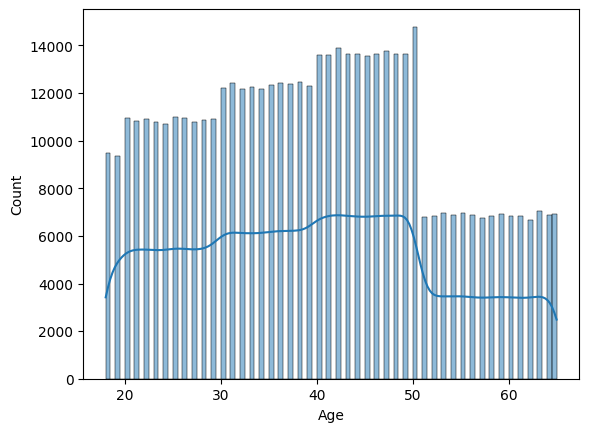

In [11]:
sns.histplot(df['Age'], kde=True)
plt.show()

# Data Cleaning

#1. Check for inconsistencies (e.g., negative values in features like Age, Tenure)
#Removing rows where Age, Tenure or other key features have unrealistic values

In [12]:
df = df[(df['Age'] >= 0) & (df['Tenure'] >= 0) & (df['Usage Frequency'] >= 0)]

#2. Outlier Detection using the IQR method

In [13]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Applying outlier detection to the selected numerical columns

In [14]:
numerical_columns = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']
for col in numerical_columns:
    df = remove_outliers(df, col)

# Feature Engineering

#1. Creating 'Engagement Level' feature

In [15]:
df['Engagement Level'] = df['Usage Frequency'] * df['Tenure']

In [16]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Engagement Level
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,546.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,49.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,56.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,798.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,640.0


# Example: Correlation Heatmap

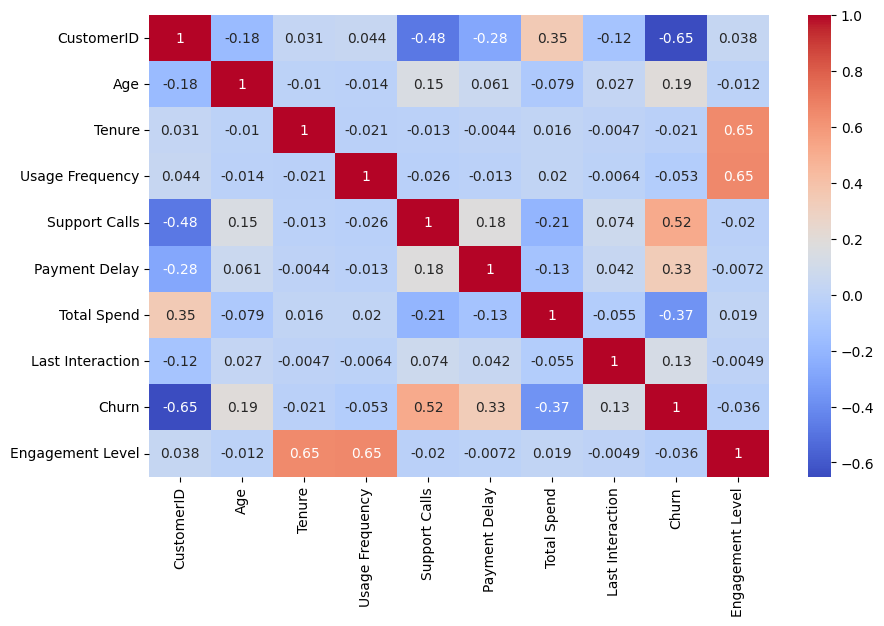

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Count of customers by Gender

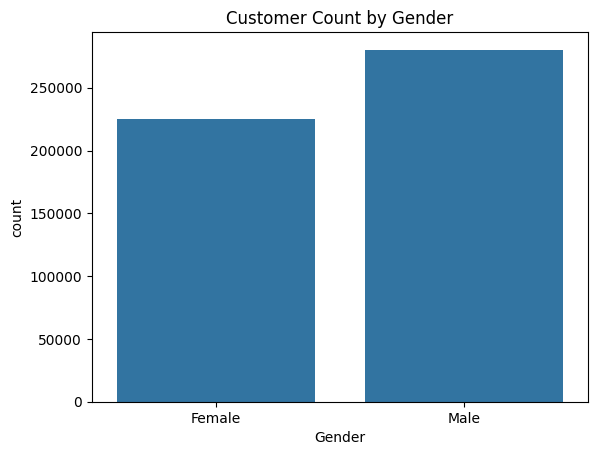

In [18]:
sns.countplot(x='Gender', data=df)
plt.title('Customer Count by Gender')
plt.show()

# Count of customers by Subscription Type

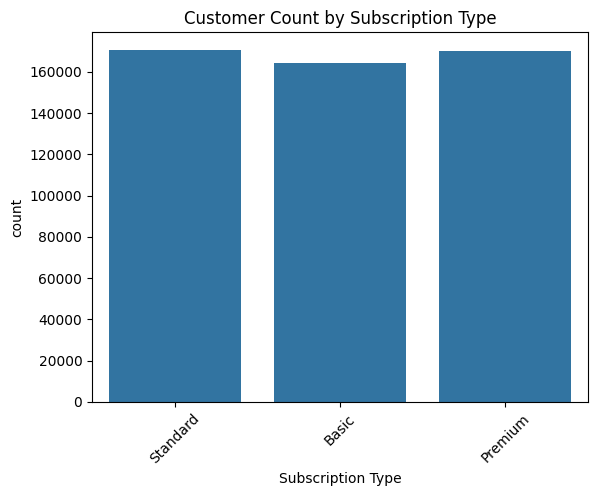

In [19]:
sns.countplot(x='Subscription Type', data=df)
plt.title('Customer Count by Subscription Type')
plt.xticks(rotation=45)
plt.show()


# Count of customers by Contract Length

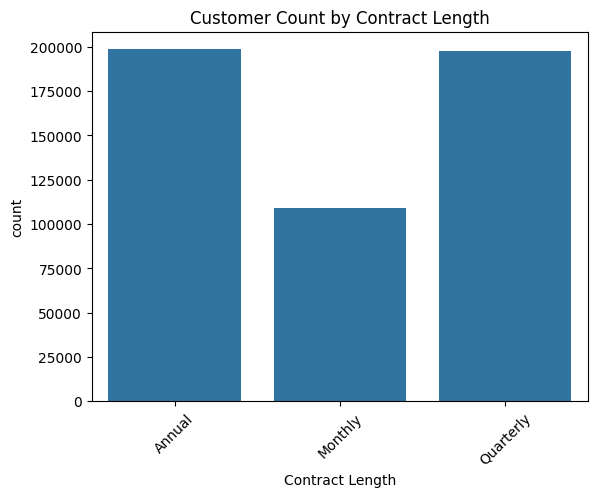

In [20]:
sns.countplot(x='Contract Length', data=df)
plt.title('Customer Count by Contract Length')
plt.xticks(rotation=45)
plt.show()

# Churn by Gender

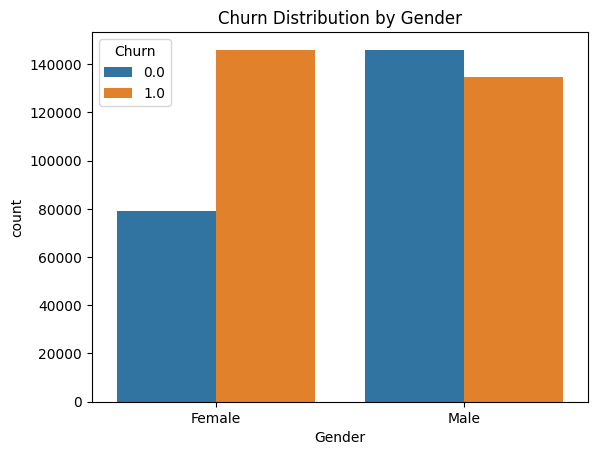

In [21]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn Distribution by Gender')
plt.show()

# Churn by Subscription Type


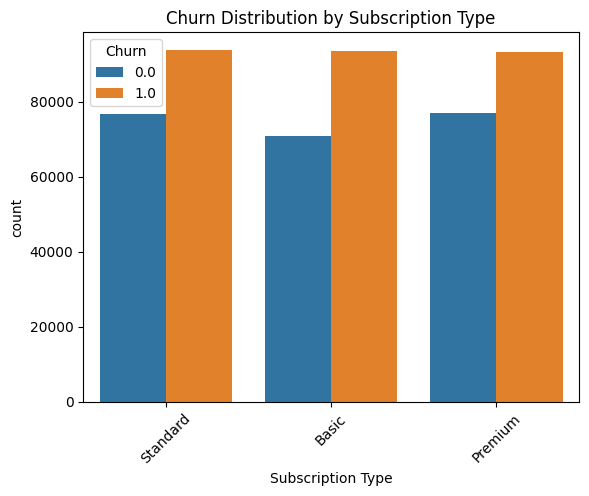

In [22]:
sns.countplot(x='Subscription Type', hue='Churn', data=df)
plt.title('Churn Distribution by Subscription Type')
plt.xticks(rotation=45)
plt.show()

In [36]:
df.to_csv('final_customer_churn_data.csv', index=False)